# String Operations- Which month was the snowiest

## Install

In [1]:
SYFT_VERSION = ">=0.8.1b0,<0.9"
package_string = f'"syft{SYFT_VERSION}"'
# !pip install {package_string} -f https://whls.blob.core.windows.net/unstable/index.html -q

In [2]:
import syft as sy
sy.requires(SYFT_VERSION)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/koen/workspace/PySyft


✅ The installed version of syft==0.8.1b2 matches the requirement >=0.8.1b0 and the requirement <0.9


In [3]:
node = sy.orchestra.launch(name="pandas-test-domain-6", reset=True)

SQLite Store Path:
!open file:///var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/64fedb362c3f18231d72cbc235704a83.sqlite



# Data owner: upload dataset

In [4]:
root_domain_client = node.login(email="info@openmined.org", password="changethis")

## Load data

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [6]:
from datetime import timedelta
import random
from dateutil.parser import parse
from pandas._libs.tslibs.timestamps import Timestamp
from syft.service.project.project import Project
from syft.util.util import autocache, PANDAS_DATA

<AxesSubplot: xlabel='Date/Time'>

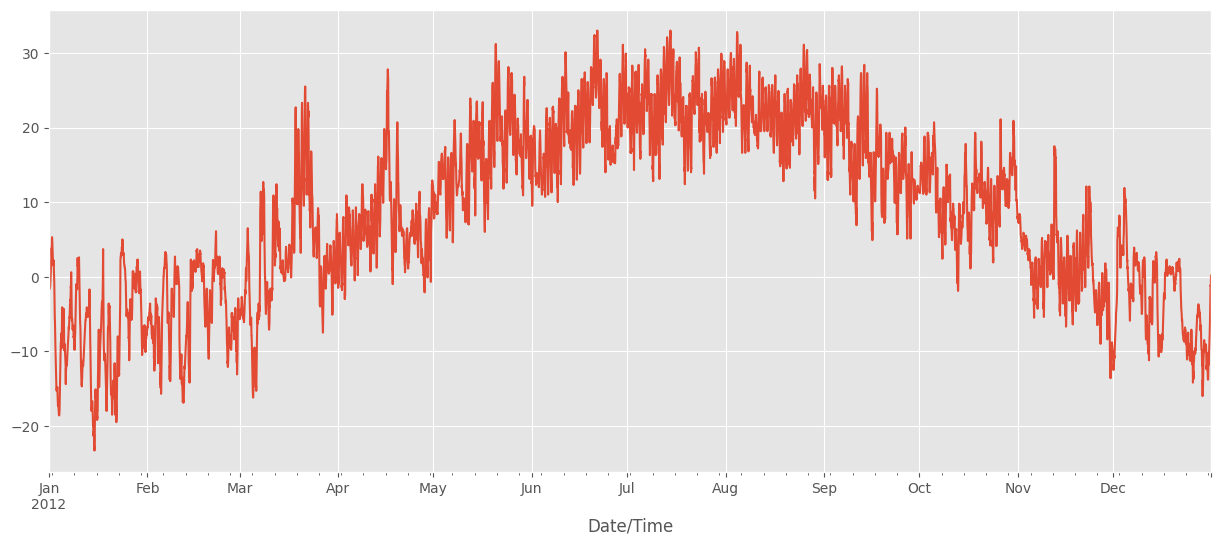

In [7]:
weather_2012_final = pd.read_csv(autocache(f"{PANDAS_DATA}/weather_2012.csv"), index_col='Date/Time', parse_dates=True)
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

## Create mock data

Instead, we upload our dataset per month as a starting point

In [8]:
weather_types = set(weather_2012_final.Weather.to_list())

In [9]:
def get_mock_date(i):
    return str(parse('Jun 1 2010') + timedelta(days=i))

def get_mock_row(i):
    res = dict()
    for k, function in mock_functions.items():
        res[k] = function()
    return res
    

In [10]:
mock_functions = {
    "Temp (C)": lambda: random.uniform(-10, 40),
    "Dew Point Temp (C)": lambda: random.uniform(-10, 10),
    "Rel Hum (%)": lambda: random.randint(50, 100),
    "Wind Spd (km/h)": lambda: random.randint(1, 30),
    'Visibility (km)': lambda: random.uniform(0.5, 40),
    'Stn Press (kPa)': lambda: random.uniform(50, 100),
    'Weather': lambda: random.choice(list(weather_types))
}

In [11]:
mock = pd.DataFrame(index=[Timestamp(get_mock_date(i)) for i in range(len(weather_2012_final))],
                    data=[get_mock_row(i) for i in range(len(weather_2012_final))],
                    columns=weather_2012_final.columns)
    


Upload the data

In [12]:
dataset = sy.Dataset(name="test", asset_list=[sy.Asset(name=f"weather", data=weather_2012_final,
                                                       mock=mock, mock_is_real=False)])
root_domain_client.upload_dataset(dataset)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]


Uploading: weather


<class 'syft.service.response.SyftSuccess'>: Dataset Added

In [13]:
weather_2012_final.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Create user account

In [14]:
user = root_domain_client.register(name="Jane Doe", email="jane@caltech.edu",
                            password="abc123", institution="Caltech", website="https://www.caltech.edu/")
# todo: give user data scientist role
guest_domain_client = node.client
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

# Data scientist: create result pointers

In [15]:
import numpy as np
import pandas as pd

## Summary
By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

## Get mocks

In [16]:
ds = guest_domain_client.datasets[0]

In [17]:
asset = ds.assets[0]

In [18]:
weather_2012 = asset.mock

## String Operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great examples in the documentation.

In [19]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.



In [20]:
# Not super useful
is_snowing[:5]

```python
TwinPointer(Mock)
```
2010-06-01    False
2010-06-02    False
2010-06-03    False
2010-06-04    False
2010-06-05    False
Name: Weather, dtype: bool

<AxesSubplot: >

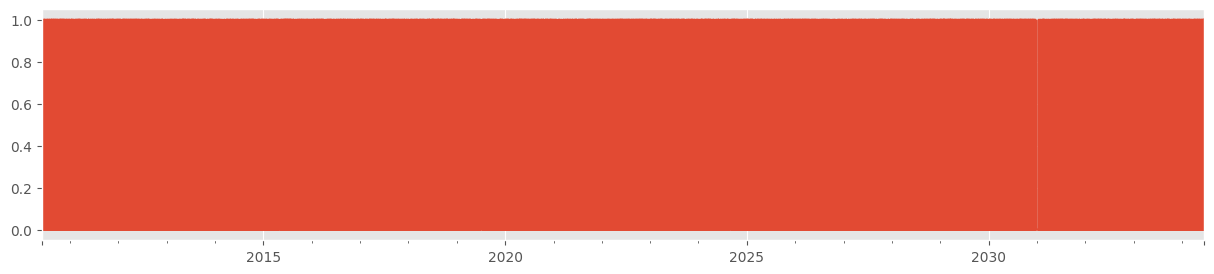

In [21]:
# More useful!
is_snowing=is_snowing.astype(float)
is_snowing.plot()

## Use resampling to find the snowiest month

If we wanted the median temperature each month, we could use the resample() method like this:

In [22]:
weather_2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,-8.364939,7.575816,94,30,5.139528,98.052229,"Freezing Rain,Haze"
2010-06-02,30.343948,3.492974,65,7,36.776304,85.504378,"Rain,Haze"
2010-06-03,2.541620,-0.197359,74,12,18.068634,59.317941,"Freezing Drizzle,Haze"
2010-06-04,0.781857,-6.029234,87,11,3.249926,89.055112,"Rain,Fog"
2010-06-05,-3.815114,-2.037537,100,13,11.991984,68.283339,"Freezing Rain,Haze"
...,...,...,...,...,...,...,...
2034-06-14,11.259252,-8.434617,87,15,36.284043,96.109557,Snow Pellets
2034-06-15,18.151976,-2.640984,83,23,4.207025,82.289849,Fog
2034-06-16,-6.630790,0.685292,85,21,17.293878,90.656615,Drizzle
2034-06-17,33.155647,-6.055404,58,29,31.605172,65.854636,"Rain,Fog"


In [23]:
from syft.serde.recursive import recursive_serde_register

<AxesSubplot: >

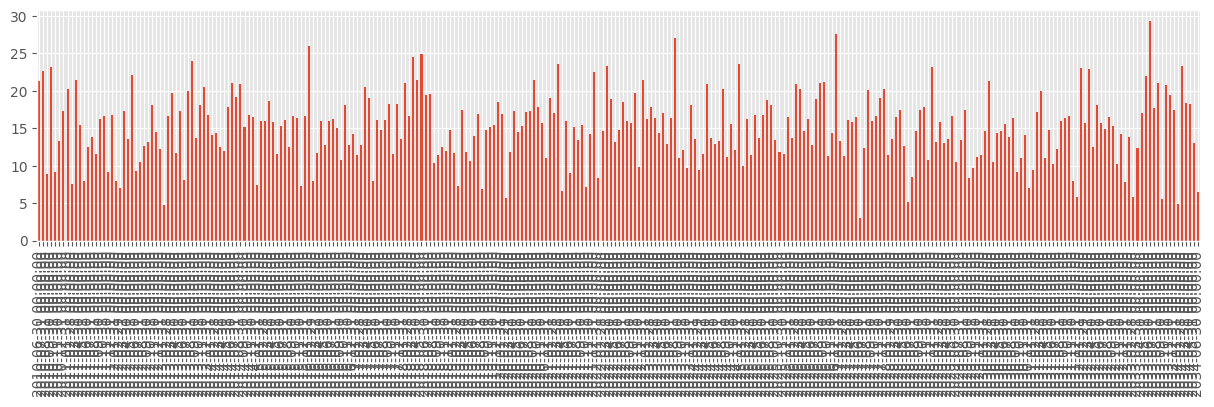

In [24]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

Unsurprisingly, July and August are the warmest.

So we can think of snowiness as being a bunch of 1s and 0s instead of Trues and Falses:

In [25]:
is_snowing.astype(float)[:10]

```python
TwinPointer(Mock)
```
2010-06-01    0.0
2010-06-02    0.0
2010-06-03    0.0
2010-06-04    0.0
2010-06-05    0.0
2010-06-06    1.0
2010-06-07    1.0
2010-06-08    1.0
2010-06-09    0.0
2010-06-10    0.0
Name: Weather, dtype: float64

and then use resample to find the percentage of time it was snowing each month

<AxesSubplot: >

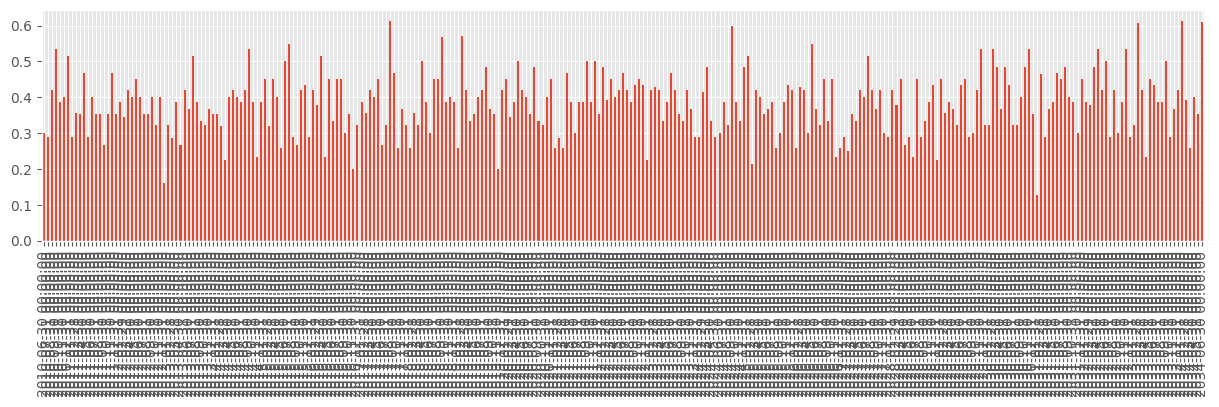

In [26]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.


## Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:



In [27]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.

In [28]:
stats = guest_client.api.lib.pandas.concat([temperature, snowiness], axis=1)

In [29]:
stats.columns = ["temperature", "snowiness"]

## Requesting the real result

In [40]:
stats.request(guest_client)
temperature.request(guest_client)
snowiness.request(guest_client)

```python
class Request:
  id: str = cf0a51f1017647e694ec7a6ad663f3e8
  requesting_user_verify_key: str = ef91ab3f4982e4eb402bc7f28d301f06d36781ca6681f66de694e68edd261197
  approving_user_verify_key: str = None
  request_time: str = 2023-05-24 12:04:07
  approval_time: str = None
  status: str = RequestStatus.PENDING
  node_uid: str = 64fedb362c3f18231d72cbc235704a83
  request_hash: str = "b43673af42040f39394f588dd49a5fed05920abb425e8fc55ef2f937ca933941"
  changes: str = [syft.service.request.request.ActionStoreChange]

```

# Data owner: approving the request

In [44]:
root_domain_client = node.login(email="info@openmined.org", password="changethis")

In [49]:
for r in root_domain_client.api.services.request.get_all()[-3:]:
    r.approve()

# Data scientist: fetch result

In [50]:
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

real_stats = stats.get_from(guest_client)
real_temp = temperature.get_from(guest_client)
real_snow = snowiness.get_from(guest_client)


<AxesSubplot: >

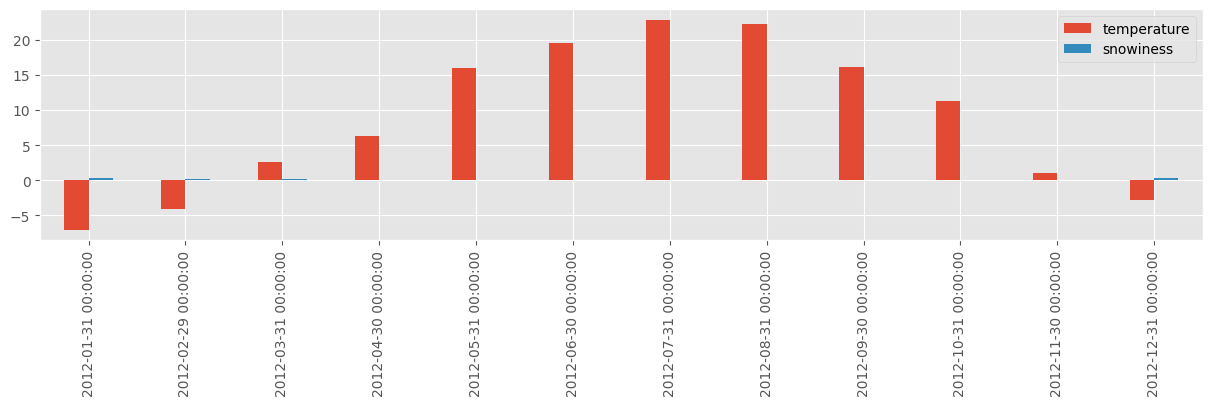

In [51]:
real_stats.plot(kind="bar")

<AxesSubplot: >

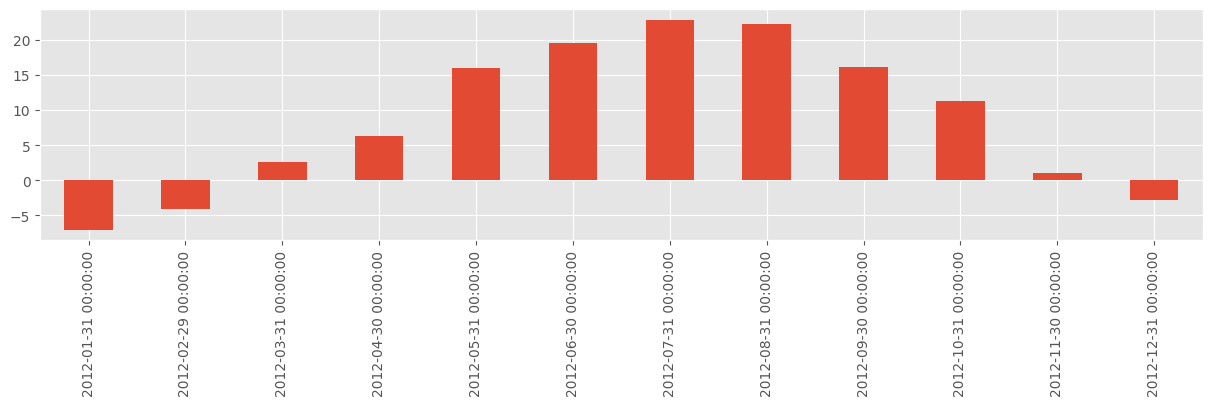

In [54]:
real_temp.plot(kind="bar")

<AxesSubplot: >

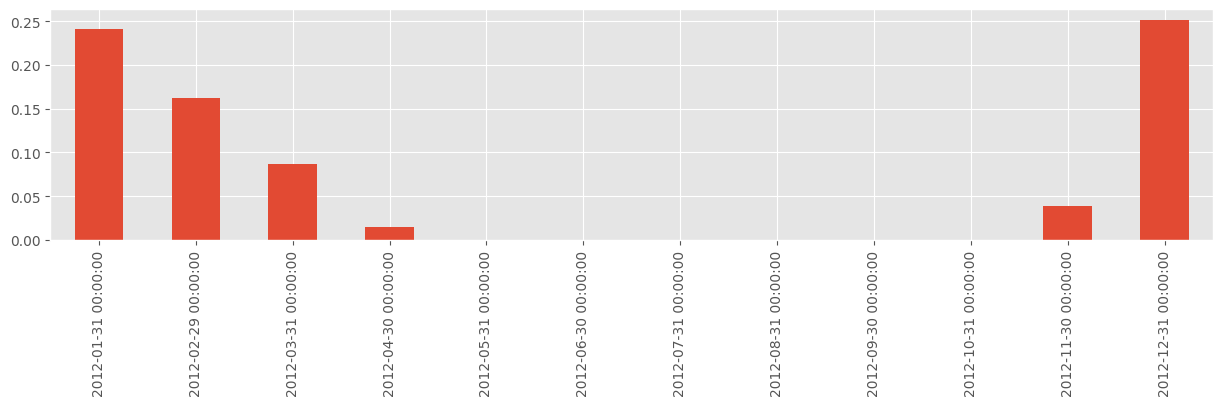

In [55]:
real_snow.plot(kind="bar")

In [ ]:
node.land()